In [34]:
import numpy as np
import pandas as pd
from statistics import mean


In [35]:
life_df = pd.read_csv('Life Expectancy Data.csv', delimiter=',')

In [36]:
# Remove whitespaces before & after column name and capitalise all column names.
life_df.columns = life_df.columns.str.strip()
life_df.columns = life_df.columns.str.title()
life_df = life_df.convert_dtypes()

In [37]:
life_df.dtypes

Country                             string
Year                                 Int64
Status                              string
Life Expectancy                    float64
Adult Mortality                      Int64
Infant Deaths                        Int64
Alcohol                            float64
Percentage Expenditure             float64
Hepatitis B                          Int64
Measles                              Int64
Bmi                                float64
Under-Five Deaths                    Int64
Polio                                Int64
Total Expenditure                  float64
Diphtheria                           Int64
Hiv/Aids                           float64
Gdp                                float64
Population                         float64
Thinness  1-19 Years               float64
Thinness 5-9 Years                 float64
Income Composition Of Resources    float64
Schooling                          float64
dtype: object

In [38]:
life_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [39]:
# Total null values amongst each column.
print(life_df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
Bmi                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
Hiv/Aids                             0
Gdp                                448
Population                         652
Thinness  1-19 Years                34
Thinness 5-9 Years                  34
Income Composition Of Resources    167
Schooling                          163
dtype: int64


# Total Expenditure Cleaning
By Anthony George 220180567
##### Aim: Complete the Total Expenditure column dataset without applying bias
The cleaning of *Total Expenditure* column data is two-fold. <br>
 1. Zero's missing, causing values of '10' to be values of '1', biasing the data terribly. <br>
 2. Values for *Year = 2015* are missing throughout this dataset column<br>

To correct the 'zero's missing' value error, I will develop an algorithm to add a zero where needed.<br>
To correct the *Year* value error, since the percentage of missing data is low,  we can use the **imputation method** to complete the dataset of this column. 
We do this by taking an average of all *Total Expenditure* values for each *Country* over all other *Years*, and populate the empty field with that value. This way, the missing data can be predicted based on the complete observed data.
The imputation method implies the development of reasonable guesses for missing data.  If the portion of missing data is too high, which in this case it is not, the results lack natural variation that could result in an effective model.

Reference: https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/

**First, let's check which countries have a *Total Expenditure* of greater than zero for the year 2015**

In [40]:
print("\nThe following countries have a Total Expenditure > 0:\n")
print(life_df['Country'].loc[(life_df['Year'] == 2015) & (life_df['Total Expenditure'] > 0)].to_string(index=False))


The following countries have a Total Expenditure > 0:

 Afghanistan
     Albania


#### Only two countries!
#### This means that all countries (excluding Afghanistan and Albania) have a Total Expenditure null value for Year = 2015 
Assessing the missing values, we can check the number of unique countries against the number of countries that have a 'Year' column value of '2015'

In [41]:
print("All Unique Countries: ", life_df['Country'].nunique())
print("Countries when Year=2015:", len(life_df.loc[life_df['Year'] == 2015]))

All Unique Countries:  193
Countries when Year=2015: 183


From these results, we can see there are 10 countries that do NOT contain data for the year 2015.
We should check the rest of the data of these countries to assess their validity 

In [42]:
# the first 'Year' entry for each country should be '2015', so let's check that.
country = ''
country_list = []
for index, row in life_df.iterrows():
    if country != row['Country']:
        country = row['Country']
        if row['Year'] == 2015:
            continue
        else:
            country_list.append(row)

print("\nThe following countries do not have data for any 'Year' other than '2013'\n")
df = pd.DataFrame(country_list)
df


The following countries do not have data for any 'Year' other than '2013'



,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
624,Cook Islands,2013,Developing,NaN,<NA>,0,0.01,0.000000,98,0,...,98,3.58,98,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,<NA>,0,0.01,11.419555,96,0,...,96,5.58,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,<NA>,0,0.01,871.878317,8,0,...,79,17.24,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,<NA>,0,0.01,0.000000,99,0,...,99,4.30,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,<NA>,0,0.01,15.606596,87,0,...,87,4.65,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,<NA>,0,0.01,0.000000,99,0,...,99,7.20,99,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,<NA>,0,NaN,344.690631,99,0,...,99,9.27,99,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,<NA>,0,8.54,0.000000,97,0,...,96,6.14,96,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,<NA>,0,0.01,0.000000,69,0,...,69,6.50,69,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,<NA>,0,0.01,78.281203,9,0,...,9,16.61,9,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


As we can see above, these 10 countries have some data populated for the *Year* 2013 only, with the zero data *Life Expectancy*. Since this column is crucial to the remainder of our analysis, **the removal of these entries from the dataset merits justification.**

In [43]:
# Drop the above rows from the dataset
for index, row in df.iterrows():
    life_df.drop(index, inplace=True)

life_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Now we have a slightly cleaner dataset, we can check the exact number of rows we need to update with our coming algorithm**

In [44]:
print('Number of rows that require updating:', 
      len(life_df.loc[(life_df['Year'] == 2015) & (life_df['Total Expenditure'].isnull())]),'\n') 

print(life_df[['Country', 'Year', 'Total Expenditure']].loc
      [
    (life_df['Year'] == 2015) & 
    (life_df['Total Expenditure'].isnull())
      ])

Number of rows that require updating: 181 

                                 Country  Year  Total Expenditure
32                               Algeria  2015                NaN
48                                Angola  2015                NaN
64                   Antigua and Barbuda  2015                NaN
80                             Argentina  2015                NaN
96                               Armenia  2015                NaN
...                                  ...   ...                ...
2858  Venezuela (Bolivarian Republic of)  2015                NaN
2874                            Viet Nam  2015                NaN
2890                               Yemen  2015                NaN
2906                              Zambia  2015                NaN
2922                            Zimbabwe  2015                NaN

[181 rows x 3 columns]


**Algorithm to find and correct 'missing zeros' values that should be ten's, but are one's**

In [45]:
print('\nCompensated values:\n')
ctry = ''
for index, row in life_df.iterrows():
    if country != '' and pd.notnull(row['Total Expenditure']):
        if ctry != row['Country']:
            ctry = row['Country']
            flag = False
        if row['Total Expenditure'] > 9 and flag == False:
            for i in life_df.index:
                if life_df['Country'][i] == ctry:
                    flag = True
                    if pd.notnull(life_df['Total Expenditure'][i]):
                        row = str(life_df['Total Expenditure'][i])
                        num, dec = row.split('.')
                        if int(num) == 1:
                            num = num[:1] + '0' + num[1:]
                            num = num + '.' + dec
                            num = float(num)
                            
                            # update Total Expenditure column with updated values
                            life_df['Total Expenditure'][i] = num
                            print(i, ctry, life_df['Total Expenditure'][i])



Compensated values:

132 Austria 10.94
135 Austria 10.6
136 Austria 10.4
137 Austria 10.35
138 Austria 10.53
139 Austria 10.56
140 Austria 10.48
141 Austria 10.27
142 Austria 10.12
143 Austria 10.6
241 Belgium 10.59
242 Belgium 10.57
243 Belgium 10.54
244 Belgium 10.42
245 Belgium 10.17
246 Belgium 10.39
424 Burundi 10.3
497 Canada 10.45
498 Canada 10.67
499 Canada 10.78
500 Canada 10.82
503 Canada 10.3


C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


661 Cuba 10.6
662 Cuba 10.19
664 Cuba 10.79
665 Cuba 10.42
738 Denmark 10.8
740 Denmark 10.98
741 Denmark 10.87
744 Denmark 10.18
754 Djibouti 10.57
937 France 10.57
938 France 10.45
939 France 10.53
940 France 10.6
941 France 10.53
942 France 10.43
943 France 10.22
983 Georgia 10.5
984 Georgia 10.19
997 Germany 10.99
998 Germany 10.93
1001 Germany 10.39
1002 Germany 10.18
1003 Germany 10.34
1004 Germany 10.52
1005 Germany 10.37
1006 Germany 10.62
1007 Germany 10.4
1008 Germany 10.15
1009 Germany 10.1
1126 Haiti 10.41
1182 Iceland 10.7
1315 Japan 10.23
1316 Japan 10.25
1317 Japan 10.17
1318 Japan 10.7
1379 Kiribati 10.21
1380 Kiribati 10.15
1381 Kiribati 10.37
1382 Kiribati 10.42
1383 Kiribati 10.52
1387 Kiribati 10.93
1388 Kiribati 10.6
1389 Kiribati 10.39
1471 Lebanon 10.5
1472 Lebanon 10.9
1473 Lebanon 10.86
1475 Lesotho 10.62
1479 Lesotho 10.87
1491 Liberia 10.4
1493 Liberia 10.19
1498 Liberia 10.24
1499 Liberia 10.9
1572 Malawi 10.96
1575 Malawi 10.5
1576 Malawi 10.18
1577 Malawi 

**Now that we have the correct values in place, aggregation can be done to calculate a value to populate the *Total Expenditure* field of each *Country* for *Year* == 2015**

In [46]:
print('Average of all ')
country = ''
total = []
percentages = {}
for index, row in life_df.iterrows():
    if country != row['Country']:
        if country != '' and len(total)>0:
            average = mean(total)
            percentages[country] = round(average, 2)
        country = row['Country']
        total = []
    if row['Year'] == 2015:
        continue
    else:
        if pd.notnull(row['Total Expenditure']):
            total.append(row['Total Expenditure'])

for i in percentages:
    print(i, percentages[i])

Average of all 
Afghanistan 8.26
Albania 5.94
Algeria 4.6
Angola 3.92
Antigua and Barbuda 4.79
Argentina 6.91
Armenia 4.86
Australia 8.84
Austria 10.72
Azerbaijan 5.68
Bahamas 6.71
Bahrain 3.81
Bangladesh 2.85
Barbados 6.12
Belarus 6.19
Belgium 9.56
Belize 5.04
Benin 4.64
Bhutan 5.35
Bolivia (Plurinational State of) 5.63
Bosnia and Herzegovina 8.74
Botswana 5.51
Brazil 8.02
Brunei Darussalam 2.82
Bulgaria 7.24
Burkina Faso 6.04
Burundi 7.69
Côte d'Ivoire 5.72
Cabo Verde 4.76
Cambodia 5.74
Cameroon 4.72
Canada 10.05
Central African Republic 4.04
Chad 4.38
Chile 6.91
China 4.92
Colombia 6.34
Comoros 4.83
Congo 2.99
Costa Rica 8.62
Croatia 7.37
Cuba 8.83
Cyprus 6.76
Czechia 7.05
Democratic Republic of the Congo 3.56
Denmark 10.22
Djibouti 7.67
Dominican Republic 4.68
Ecuador 5.88
Egypt 5.35
El Salvador 7.1
Equatorial Guinea 2.93
Eritrea 3.47
Estonia 5.69
Ethiopia 4.9
Fiji 3.9
Finland 8.61
France 10.76
Gabon 3.18
Gambia 5.31
Georgia 8.53
Germany 10.67
Ghana 4.33
Greece 9.04
Grenada 6.19
Gu

Comparing the result of the aggregation with known results, we see that this imputation to derive the missing values for this column is actually quite accurate.<br><br>
We can see the aggregation has calculated Afghanistan has a Total Percentage for Year 2015 of 8.26 <br>
Compared with Afghanistan's actual Total Percentage for Year 2015 is 8.16 <br>
Similarly, Albania's actual = 6.0 vs the calcualted 5.94 <br>
Pretty accurate!<br>
Let's update the dataset

In [47]:
for i in percentages:     
    life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015), 'Total Expenditure'] = percentages[i]
    #print(life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015)])
life_df.loc[life_df['Year'] == 2015]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74,0,4.60,364.975229,99,0,...,99,5.94,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19,21,NaN,0.000000,95,63,...,95,4.60,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335,66,NaN,0.000000,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13,0,NaN,0.000000,99,0,...,86,4.79,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157,9,NaN,0.000000,87,0,...,87,5.00,87,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127,28,NaN,0.000000,97,256,...,97,5.98,97,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224,37,NaN,0.000000,69,468,...,63,5.01,69,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33,27,NaN,0.000000,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [48]:
# If all null are dropped.
#clean_df = life_df.dropna()

In [49]:
# 2015 percentage exp. 
# unique country names.

# Alcohol Cleaning
By Hooman Shykhipour 220060109
##### Aim: Complete the Alcohol column dataset (N/A removal)
Values for *Year = 2015* are missing throughout this dataset column<br>

In [50]:
print("\nThese countries have Alcohol consumption values in 2015 (not N/A):\n")
print(life_df['Country'].loc[(life_df['Year'] == 2015) & (life_df['Alcohol'] > 0)].to_string(index=False))


These countries have Alcohol consumption values in 2015 (not N/A):

                                       Afghanistan
                                           Albania
                                       New Zealand
                                            Norway
                                         Singapore
 United Kingdom of Great Britain and Northern I...


In [51]:
#find the average of alcohol consumption for each country

country = ''
total = []
averageAlcohol = {}
for index, row in life_df.iterrows():
    if country != row['Country']:
        if country != '' and len(total)>0:
            average = mean(total)
            averageAlcohol[country] = round(average, 2)
        country = row['Country']
        total = []
    if row['Year'] == 2015:
        continue
    else:
        if pd.notnull(row['Alcohol']):
            total.append(row['Alcohol'])

for i in averageAlcohol:
    print(i, averageAlcohol[i])

Afghanistan 0.01
Albania 4.87
Algeria 0.41
Angola 5.74
Antigua and Barbuda 7.95
Argentina 7.97
Armenia 3.7
Australia 10.16
Austria 12.24
Azerbaijan 0.99
Bahamas 10.27
Bahrain 1.93
Bangladesh 0.01
Barbados 8.21
Belarus 13.5
Belgium 11.04
Belize 6.25
Benin 1.0
Bhutan 0.28
Bolivia (Plurinational State of) 3.21
Bosnia and Herzegovina 4.41
Botswana 4.67
Brazil 7.21
Brunei Darussalam 0.38
Bulgaria 10.87
Burkina Faso 4.24
Burundi 4.1
Côte d'Ivoire 2.84
Cabo Verde 3.45
Cambodia 1.49
Cameroon 4.14
Canada 8.05
Central African Republic 1.23
Chad 0.41
Chile 6.98
China 4.18
Colombia 4.42
Comoros 0.13
Congo 2.17
Costa Rica 3.92
Croatia 12.45
Cuba 4.19
Cyprus 10.26
Czechia 13.03
Democratic People's Republic of Korea 3.0
Democratic Republic of the Congo 1.42
Denmark 10.71
Djibouti 0.76
Dominican Republic 6.03
Ecuador 3.81
Egypt 0.19
El Salvador 2.69
Equatorial Guinea 7.34
Eritrea 0.61
Estonia 9.01
Ethiopia 1.07
Fiji 1.46
Finland 9.55
France 12.4
Gabon 7.88
Gambia 2.13
Georgia 5.62
Germany 11.63
Ghana 

In [52]:
# insert average of alcohol consumption for year 2015 which are N/A
for i in averageAlcohol:
    life_df.loc[(life_df['Country'] == i) & (life_df['Year'] == 2015) , 'Alcohol'] = averageAlcohol[i]
# Montenegro does not have alcohol consumption for year 2005, below line insert avarage of Montengro for 2005
    life_df.loc[(life_df['Country'] == 'Montenegro') & (life_df['Year'] == 2005) , 'Alcohol'] = averageAlcohol[i]

life_df.loc[life_df['Year'] == 2015]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.26,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74,0,4.87,364.975229,99,0,...,99,5.94,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19,21,0.41,0.000000,95,63,...,95,4.60,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335,66,5.74,0.000000,64,118,...,7,3.92,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13,0,7.95,0.000000,99,0,...,86,4.79,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157,9,7.42,0.000000,87,0,...,87,5.00,87,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127,28,3.09,0.000000,97,256,...,97,5.98,97,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224,37,0.05,0.000000,69,468,...,63,5.01,69,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33,27,2.24,0.000000,9,9,...,9,5.82,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [53]:
print(life_df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             17
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                               19
Total Expenditure                   48
Diphtheria                          19
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


## Result:
Missing values for alcohol consuption reduced to 16 (initially was 194). These 16 missing values are all for **South Sudan** which does not have any alcohol consumption data for any year.<br>
**Zimbabwe** needs small fix
     


# Polio, Diphtheria & Hepatitis B Cleaning
By Sarah Gosling 220094149

#### Aim: Complete cleansing the Polio, Diptheria & Hepatitis B column dataset without applying bias

There are two issues with the data in these columns, missing values and single integer outliers. I identified this by graphing the data in scatter plots, making it very clear there were quite a few single digit outliers. To remedy these issues I filled the null values using Pandas interpolate(linear) method which fills the entries with like data. I then found all the single digit entries, set them to NaN and then used interpolate(linear) to fill these with like data.

#### First Step: Filling nulls for each column and plot results showing the single digit outliers.

List of columns and their null count


Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             17
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                                0
Total Expenditure                   48
Diphtheria                           0
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


Scatterplots showing single digit outliers.


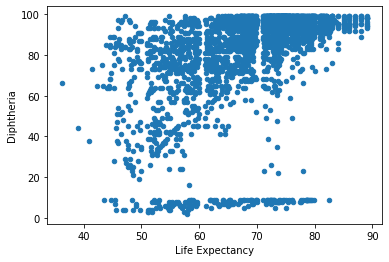

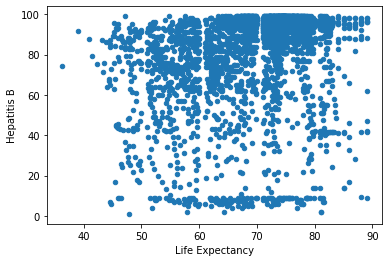

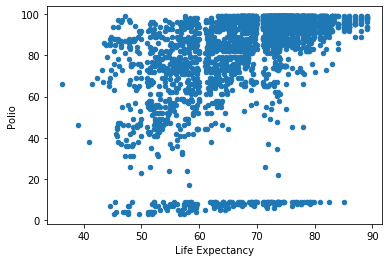

In [54]:
# Convert types to float to be able to use interpolate() function.
life_df['Diphtheria'] = life_df['Diphtheria'].astype(float)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(float)
life_df['Polio'] = life_df['Polio'].astype(float)

# Use interpolate function to fill in NaN entries with like data.
life_df['Life Expectancy'] = life_df['Life Expectancy'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='forward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing single digit outliers.")

# Scatterplots showing the single digit outliers for each column.
ax = life_df.plot.scatter(x='Life Expectancy', y='Diphtheria')
ax = life_df.plot.scatter(x='Life Expectancy', y='Hepatitis B')
ax = life_df.plot.scatter(x='Life Expectancy', y='Polio')

#### Second Step: Editing the single digit outliers to be similar to like entries.

List of columns and their null count


Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                      0
Infant Deaths                        0
Alcohol                             17
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
Bmi                                 32
Under-Five Deaths                    0
Polio                                0
Total Expenditure                   48
Diphtheria                           0
Hiv/Aids                             0
Gdp                                443
Population                         644
Thinness  1-19 Years                32
Thinness 5-9 Years                  32
Income Composition Of Resources    160
Schooling                          160
dtype: int64


Scatterplots showing rectified outliers.


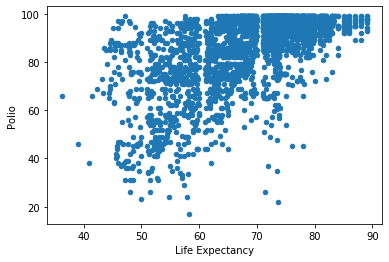

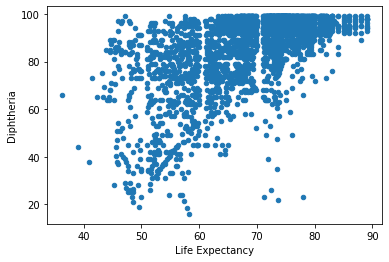

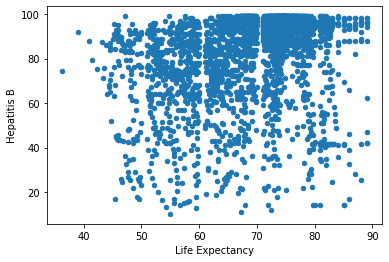

In [56]:
# Change the type to string.
life_df['Polio'] = life_df['Polio'].astype(str)
life_df['Diphtheria'] = life_df['Diphtheria'].astype(str)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(str)

# Go through and find the single digit entries and change them to NaN.
for value in life_df['Polio']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Polio'] == value, 'Polio'] = np.NaN
        
for value in life_df['Diphtheria']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Diphtheria'] == value, 'Diphtheria'] = np.NaN
        
for value in life_df['Hepatitis B']:
    value = str(value)
    if (len(value) == 3):
        life_df.loc[life_df['Hepatitis B'] == value, 'Hepatitis B'] = np.NaN
    
# Change data type back to float.
life_df['Polio'] = life_df['Polio'].astype(float)
life_df['Diphtheria'] = life_df['Diphtheria'].astype(float)
life_df['Hepatitis B'] = life_df['Hepatitis B'].astype(float)

# Use interpolate() function to fill the NaN entries with like data. Direction forwards/backwards to get 1st and last entries.
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Polio'] = life_df['Polio'].interpolate(method ='linear', limit_direction='backward', axis=0)

life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Diphtheria'] = life_df['Diphtheria'].interpolate(method ='linear', limit_direction='backward', axis=0)

life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='forward', axis=0)
life_df['Hepatitis B'] = life_df['Hepatitis B'].interpolate(method ='linear', limit_direction='backward', axis=0)

print("List of columns and their null count")
print("\n")
print(life_df.isnull().sum())
print("\n")
print("Scatterplots showing rectified outliers.")

# Plot the results of cleaned columns.
ax = life_df.plot.scatter(x='Life Expectancy', y='Polio')
ax = life_df.plot.scatter(x='Life Expectancy', y='Diphtheria')
ax = life_df.plot.scatter(x='Life Expectancy', y='Hepatitis B')